In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

## vegetation - sentinel 2

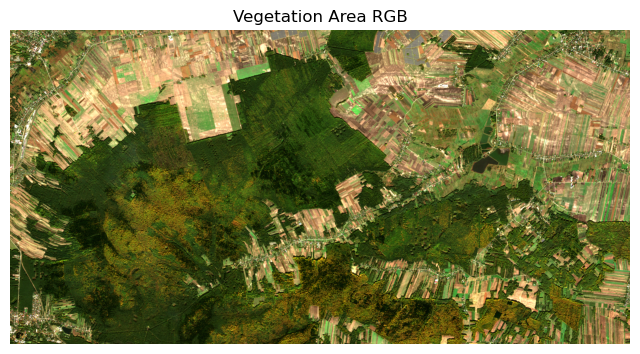

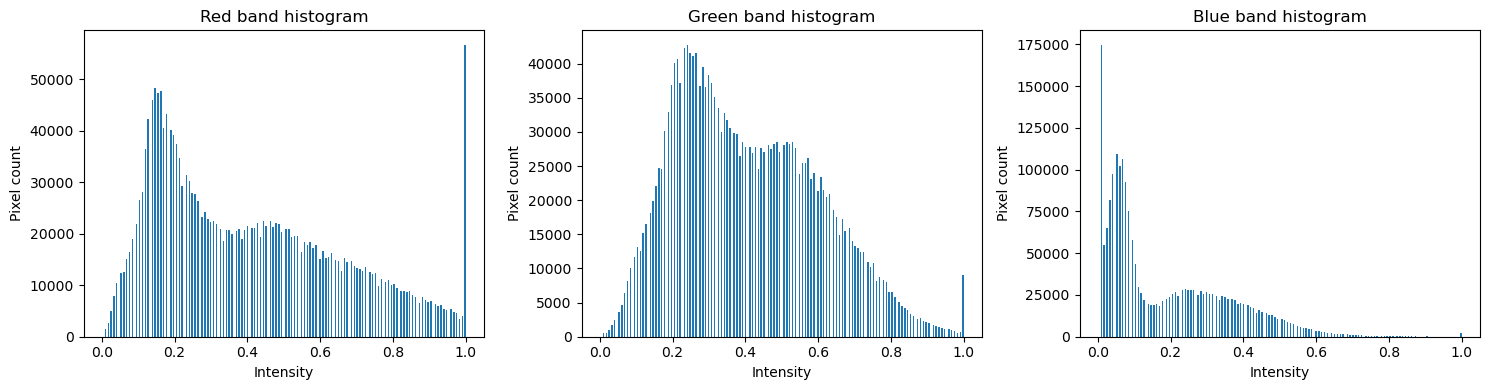

In [19]:
with rasterio.open("vegetation.tif") as src:
    veg = src.read()

veg = veg.astype(np.float32)
veg /= np.percentile(veg, 99)
veg = np.clip(veg, 0, 1)

veg_rgb = np.transpose(veg, (1, 2, 0))

plt.figure(figsize=(8, 8))
plt.imshow(veg_rgb)
plt.title("Vegetation Area RGB")
plt.axis("off")
plt.show()

R = veg_rgb[:, :, 0]
G = veg_rgb[:, :, 1]
B = veg_rgb[:, :, 2]

bands = [R, G, B]
names = ["Red", "Green", "Blue"]

plt.figure(figsize=(15, 4))

for i, (band, name) in enumerate(zip(bands, names), 1):
    plt.subplot(1, 3, i)
    plt.hist(band.ravel(), bins=256, range=(0, 1))
    plt.title(f"{name} band histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel count")

plt.tight_layout()
plt.show()

## urban - sentinel 2

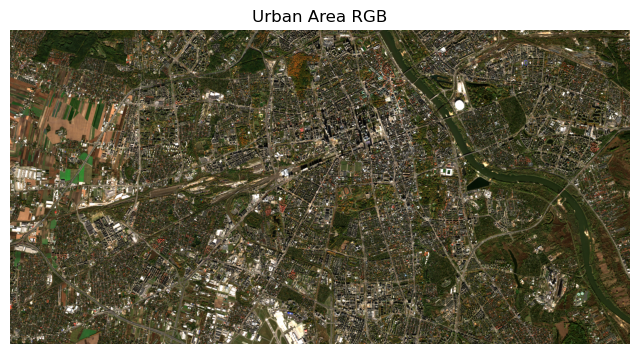

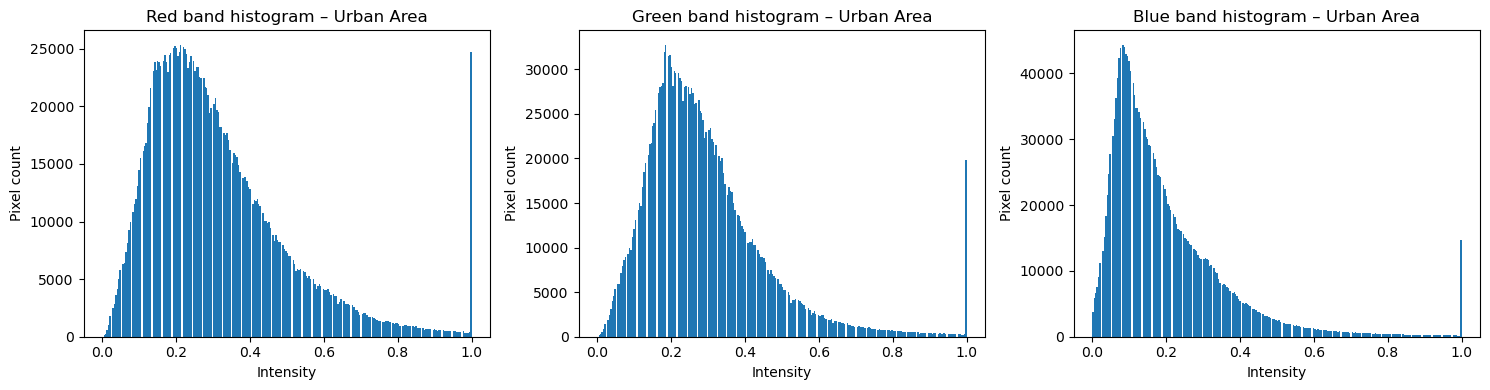

In [16]:
path = "urban.tif"
with rasterio.open(path) as src:
    urb = src.read()

urb = urb.astype(np.float32)
urb /= np.percentile(urb, 99)
urb = np.clip(urb, 0, 1)

urb_rgb = np.transpose(urb, (1, 2, 0))

plt.figure(figsize=(8, 8))
plt.imshow(urb_rgb)
plt.title("Urban Area RGB")
plt.axis("off")
plt.show()

R = urb_rgb[:, :, 0]
G = urb_rgb[:, :, 1]
B = urb_rgb[:, :, 2]

bands = [R, G, B]
names = ["Red", "Green", "Blue"]

plt.figure(figsize=(15, 4))
for i, (band, name) in enumerate(zip(bands, names), 1):
    plt.subplot(1, 3, i)
    plt.hist(band.ravel(), bins=256, range=(0, 1))
    plt.title(f"{name} band histogram – Urban Area")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel count")

plt.tight_layout()
plt.show()


## observation

The histograms show that urban areas are dominated by dark pixels, mainly due to roads, buildings and shadows, while natural areas have higher intensities—especially in the Green band—because vegetation reflects more light.

## vegetation - sentinel 1

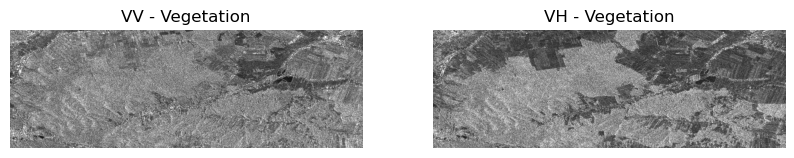

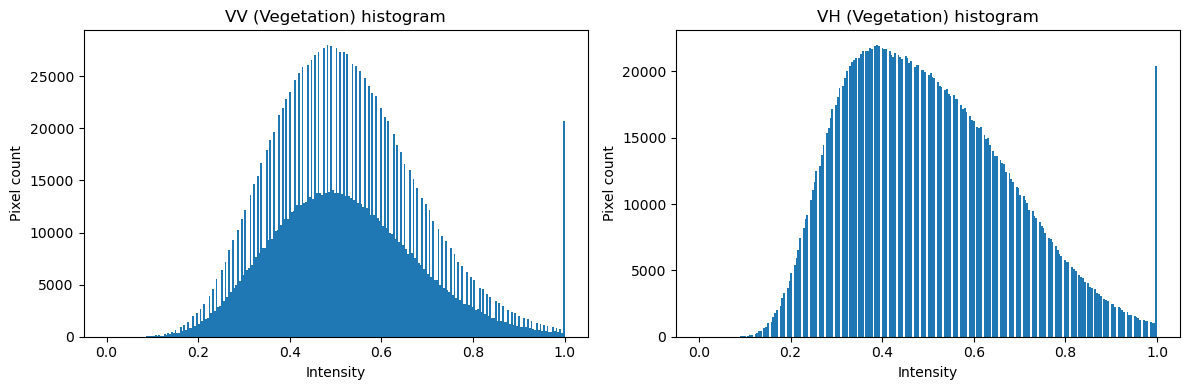

In [17]:
with rasterio.open("vv_vegetation.tif") as src:
    vv = src.read(1).astype(np.float32)

with rasterio.open("vh_vegetation.tif") as src:
    vh = src.read(1).astype(np.float32)

vv_norm = vv / np.percentile(vv, 99)
vv_norm = np.clip(vv_norm, 0, 1)

vh_norm = vh / np.percentile(vh, 99)
vh_norm = np.clip(vh_norm, 0, 1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(vv_norm, cmap='gray')
plt.title("VV - Vegetation")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(vh_norm, cmap='gray')
plt.title("VH - Vegetation")
plt.axis("off")

plt.show()


bands = [vv_norm, vh_norm]
names = ["VV (Vegetation)", "VH (Vegetation)"]

plt.figure(figsize=(12, 4))

for i, (band, name) in enumerate(zip(bands, names), 1):
    plt.subplot(1, 2, i)
    plt.hist(band.ravel(), bins=256, range=(0, 1))
    plt.title(f"{name} histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel count")

plt.tight_layout()
plt.show()

## urban - sentinel 1

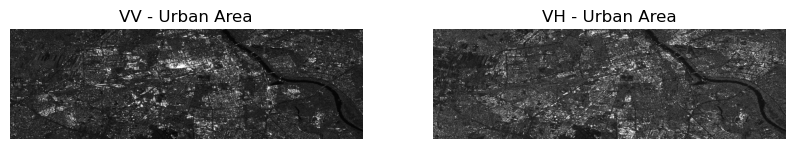

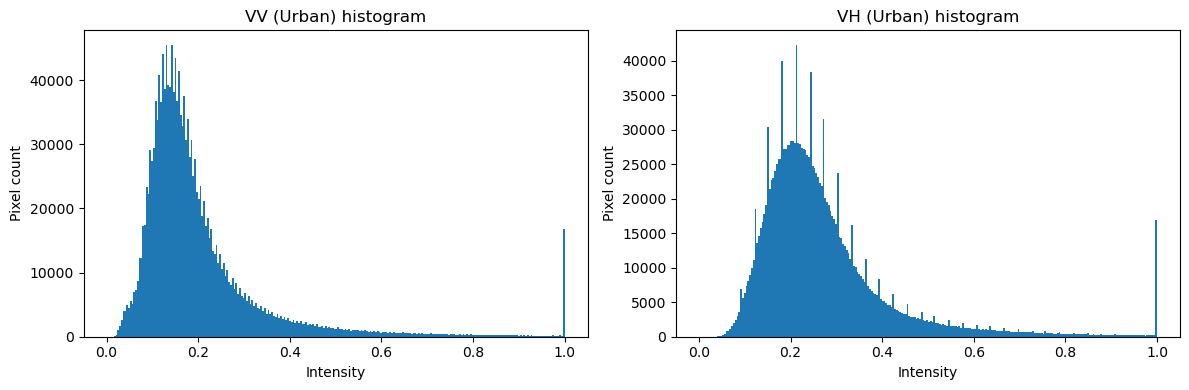

In [18]:
with rasterio.open("vv_urban.tif") as src:
    vv = src.read(1).astype(np.float32)

with rasterio.open("vh_urban.tif") as src:
    vh = src.read(1).astype(np.float32)

vv_norm = vv / np.percentile(vv, 99)
vv_norm = np.clip(vv_norm, 0, 1)

vh_norm = vh / np.percentile(vh, 99)
vh_norm = np.clip(vh_norm, 0, 1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(vv_norm, cmap='gray')
plt.title("VV - Urban Area")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(vh_norm, cmap='gray')
plt.title("VH - Urban Area")
plt.axis("off")

plt.show()

bands = [vv_norm, vh_norm]
names = ["VV (Urban)", "VH (Urban)"]

plt.figure(figsize=(12, 4))

for i, (band, name) in enumerate(zip(bands, names), 1):
    plt.subplot(1, 2, i)
    plt.hist(band.ravel(), bins=256, range=(0, 1))
    plt.title(f"{name} histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel count")

plt.tight_layout()
plt.show()

## observation

Urban areas have lower but more varied VV and VH values because buildings and roads reflect radar differently. Vegetation areas show smoother and more uniform histograms, with both VV and VH concentrated around medium intensities.

## stegenography 

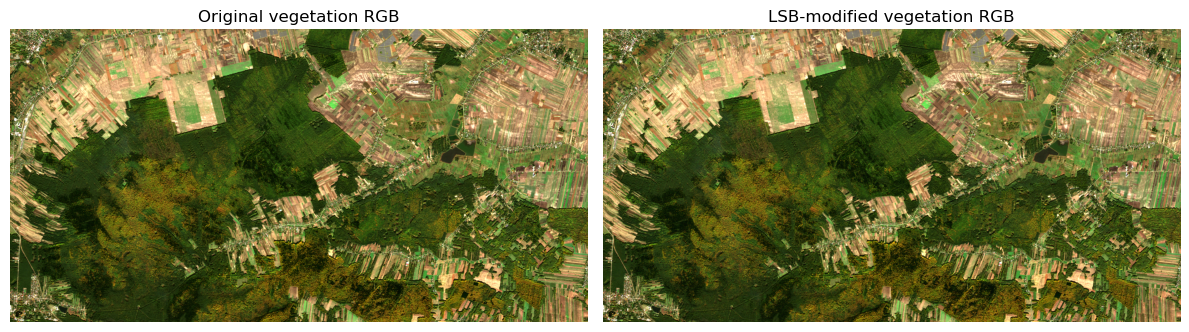

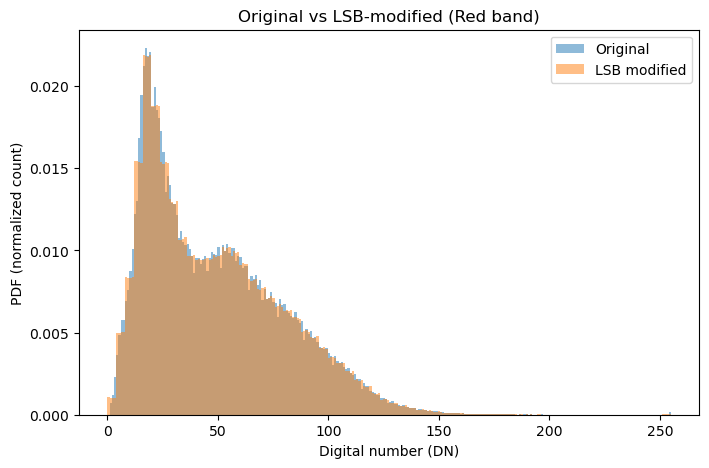

In [21]:
path = "vegetation.tif"

with rasterio.open(path) as src:
    veg = src.read()
    profile = src.profile

veg_u16 = veg.astype(np.uint16)

rand2 = np.random.randint(0, 4, size=veg_u16.shape, dtype=np.uint16)

veg_cleared = veg_u16 & 0xFFFC
veg_lsb_rand = veg_cleared | rand2

def make_rgb(stack):
    rgb = np.moveaxis(stack[:3], 0, -1).astype(np.float32)
    rgb /= np.percentile(rgb, 99)
    rgb = np.clip(rgb, 0, 1)
    return rgb

orig_rgb = make_rgb(veg_u16)
mod_rgb  = make_rgb(veg_lsb_rand)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(orig_rgb)
plt.title("Original vegetation RGB")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mod_rgb)
plt.title("LSB-modified vegetation RGB")
plt.axis("off")

plt.tight_layout()
plt.show()

band_idx = 0

orig_band = veg_u16[band_idx].ravel()
mod_band  = veg_lsb_rand[band_idx].ravel()

plt.figure(figsize=(8, 5))
plt.hist(orig_band, bins=256, alpha=0.5, label="Original", density=True)
plt.hist(mod_band,  bins=256, alpha=0.5, label="LSB modified", density=True)
plt.xlabel("Digital number (DN)")
plt.ylabel("PDF (normalized count)")
plt.title("Original vs LSB-modified (Red band)")
plt.legend()
plt.show()


## observation

The histograms of the original and LSB-modified images almost completely overlap, which means that replacing the last two bits has almost no effect on the pixel value distribution. Using only the histogram or PDF is not a reliable method to detect manipulation in satellite images.

## where it may be useful in EO:

detecting striping noise, detecting quantization problems, resampling or interpolation